<a href="https://colab.research.google.com/github/xeromark/TareasIA/blob/main/TareaIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea 2 de IA de Omar Marca. Github: https://github.com/xeromark/TareasIA

Para realizar esta tarea se hizo uso de la librería scikit-learn cuya documentación está en [este enlace](https://scikit-learn.org/stable/): https://scikit-learn.org/stable/

El dataset utilizado contiene información sobre el estado de salud de mujeres quienes tienen o no diabetes y se puede conseguir en [este enlace](https://www.kaggle.com/datasets/kandij/diabetes-dataset): https://www.kaggle.com/datasets/kandij/diabetes-dataset

# Pregunta 1

## Entrene el algoritmo de regresión logística sobre los datos seleccionados y aplique clasificación con algún (sub)conjunto DISJUNTO de prueba. Adicionalmente, utilice dos métricas (a su elección) de error, explicando cada una de ellas y luego comparándolas entre sí.

Donde:
TP (Verdaderos Positivos): 31
FP (Falsos Positivos): 34
FN (Falsos Negativos): 107
TN (Verdaderos Negativos): 212 

A partir de esto, se obtienen las siguiente métricas:
Acuraccy: 0.63
Recall: 0.22

Luego se tiene el siguiente gráfico:


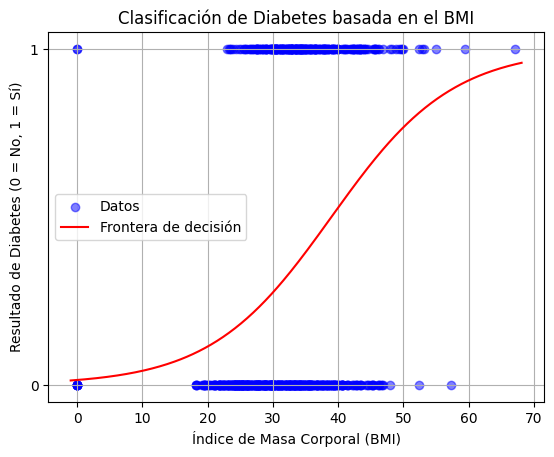

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('dataset.csv') # https://www.kaggle.com/datasets/kandij/diabetes-dataset

# Seleccionar la característica del dataset de BMI y Outcome
x = df[['BMI']]    # Indice de masa corporal (BMI)
y = df['Outcome']  # si tiene o no diabetes (Outcome)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)
# el 50% de los datos se usan para pruebas y el resto para entrenar (parametro asociado a test_size)

model = LogisticRegression() # Crear el modelo de regresión logística
model.fit(X_train, y_train) # entrenar el modelo

# Predecir en el conjunto de prueba
predictions = model.predict(X_test)

print("Donde:")

cm = confusion_matrix(y_test, predictions)
# Se extraen TP, FP, FN y TN
TN, FP, FN, TP = cm.ravel()  # Desempaquetar los valores
print(f'TP (Verdaderos Positivos): {TP}')
print(f'FP (Falsos Positivos): {FP}')
print(f'FN (Falsos Negativos): {FN}')
print(f'TN (Verdaderos Negativos): {TN} \n')

print("A partir de esto, se obtienen las siguiente métricas:")


# Se calculan las métricas
accuracy = accuracy_score(y_test, predictions)
print(f'Acuraccy: {accuracy:.2f}')

recall = recall_score(y_test, predictions)
print(f'Recall: {recall:.2f}\n')


print("Luego se tiene el siguiente gráfico:")

# Graficar los datos
plt.scatter(x, y, color='blue', label='Datos', alpha=0.5)

# Graficar la frontera de decisión
# Crear un rango de valores de BMI
BMI_range = np.linspace(df['BMI'].min()-1, df['BMI'].max()+1, 300).reshape(-1, 1)

# Calcular z = b0 + b1 * BMI para cada valor en el rango
z = model.intercept_ + model.coef_ * BMI_range

# Aplicar la función logística G(z) = 1 / (1 + e^(-z))
G_z = 1 / (1 + np.exp(-z))

# Graficar la curva de regresión logística
plt.plot(BMI_range, G_z, color='red', label='Frontera de decisión')


# Configuración del gráfico
plt.title('Clasificación de Diabetes basada en el BMI')
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Resultado de Diabetes (0 = No, 1 = Sí)')
plt.yticks([0, 1])
plt.legend()
plt.grid()
plt.show()

---

# Pregunta 2


...

---

# Pregunta 3